In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
file_path = 'Earthquakes_database.csv'
earthquakes_df = pd.read_csv(file_path, parse_dates=['Date'], infer_datetime_format=True)
earthquakes_df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 00:00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 00:00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 00:00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 00:00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 00:00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Ensure the 'Date' column is in datetime format
# Split 'Date' column into 'Year', 'Month', and 'Day'

In [15]:
earthquakes_df['Date'] = pd.to_datetime(earthquakes_df['Date'], errors='coerce', utc=True)

earthquakes_df['Year'] = earthquakes_df['Date'].dt.year
earthquakes_df['Month'] = earthquakes_df['Date'].dt.month
earthquakes_df['Day'] = earthquakes_df['Date'].dt.day

In [16]:
columns_to_drop = ['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Horizontal Distance', 'Horizontal Error']
earthquakes_df_cleaned = earthquakes_df.drop(columns=columns_to_drop)
earthquakes_df_cleaned.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,2
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,4
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,5
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,8
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,9


In [17]:
bins = [0, 4, 5, 6, 7, 8, 10]
labels = ['Minor', 'Light', 'Moderate', 'Strong', 'Major', 'Great']
earthquakes_df_cleaned['Magnitude Category'] = pd.cut(earthquakes_df_cleaned['Magnitude'], bins=bins, labels=labels)
earthquakes_df_cleaned[['Magnitude', 'Magnitude Category']].head()

,Magnitude,Magnitude Category
0,6.0,Moderate
1,5.8,Moderate
2,6.2,Strong
3,5.8,Moderate
4,5.8,Moderate


# Using melt to reshape data
# Using pivot_table to summarize data

In [18]:
melted_df = earthquakes_df_cleaned.melt(id_vars=['Date', 'Year', 'Month', 'Day'], value_vars=['Magnitude', 'Depth'], var_name='Measurement', value_name='Value')
melted_df.head()


pivot_table_df = earthquakes_df_cleaned.pivot_table(values='Magnitude', index='Year', columns='Type', aggfunc='mean')
pivot_table_df.head()

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Year,,,,
1965,6.014159,NaN,NaN,NaN
1966,6.042275,NaN,5.620,NaN
1967,6.003922,NaN,NaN,NaN
1968,6.081848,NaN,5.575,NaN
1969,6.009938,NaN,5.820,NaN


# Line chart of average magnitude per year
# Bar chart of earthquake count by magnitude category
# Scatter chart of depth vs magnitude
# Histogram of earthquake depths

<Figure size 1000x600 with 0 Axes>

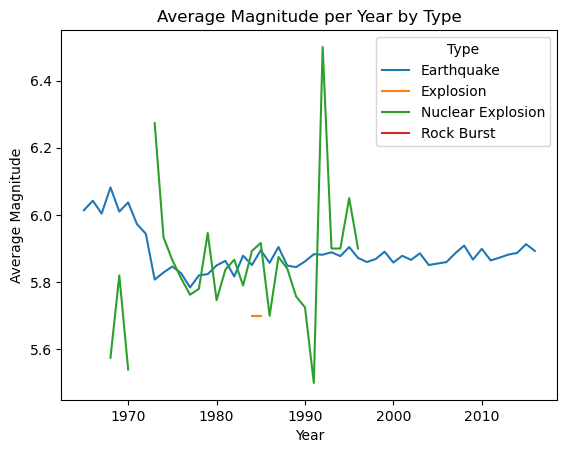

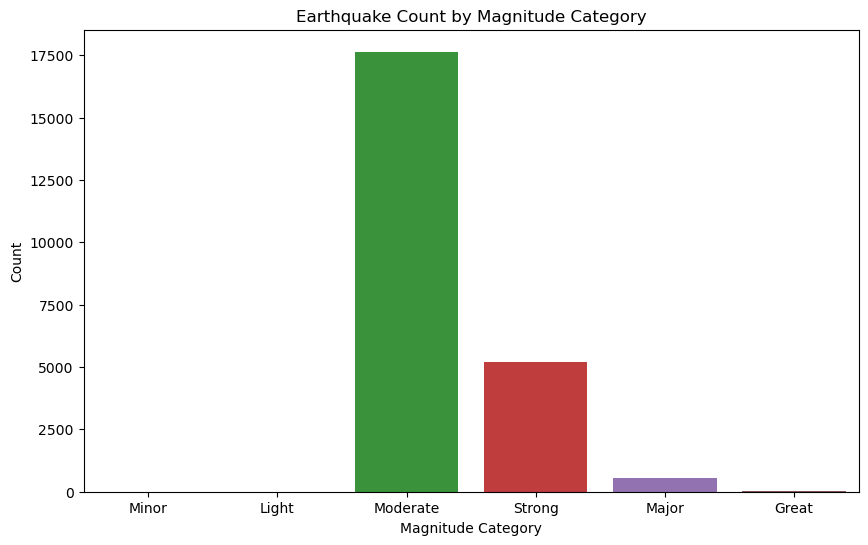

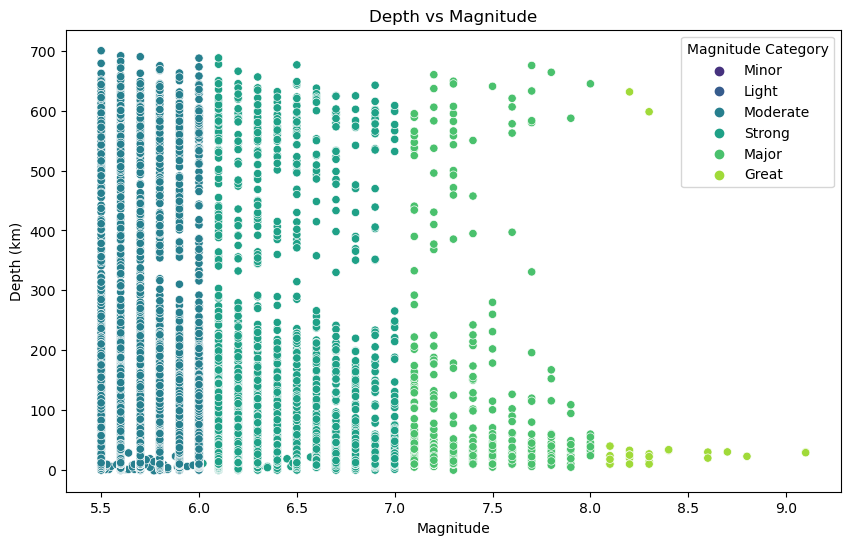

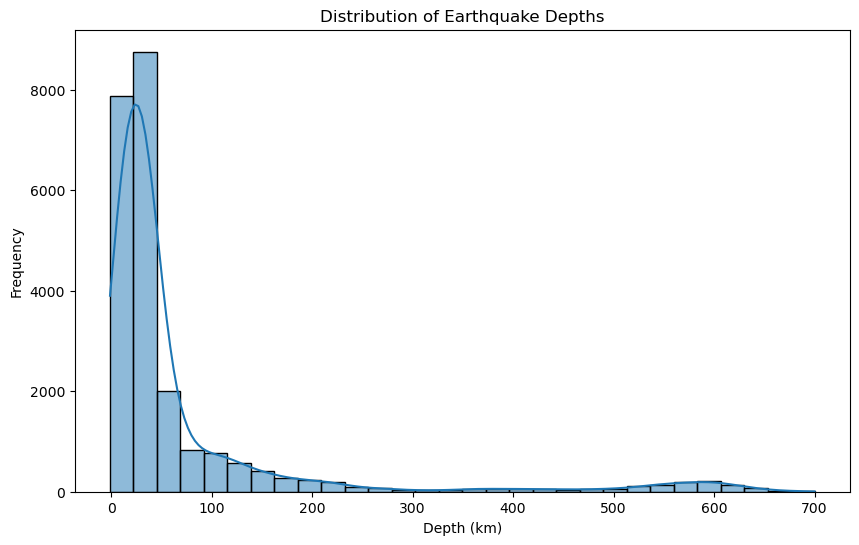

In [19]:

plt.figure(figsize=(10,6))
pivot_table_df.plot(kind='line')
plt.title('Average Magnitude per Year by Type')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.legend(title='Type')
plt.show()


plt.figure(figsize=(10,6))
sns.countplot(data=earthquakes_df_cleaned, x='Magnitude Category', order=labels)
plt.title('Earthquake Count by Magnitude Category')
plt.xlabel('Magnitude Category')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(data=earthquakes_df_cleaned, x='Magnitude', y='Depth', hue='Magnitude Category', palette='viridis')
plt.title('Depth vs Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.legend(title='Magnitude Category')
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(data=earthquakes_df_cleaned, x='Depth', bins=30, kde=True)
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

# Convert 'Date' and 'Time' into a single datetime column
# Resample the data to find the number of earthquakes per year

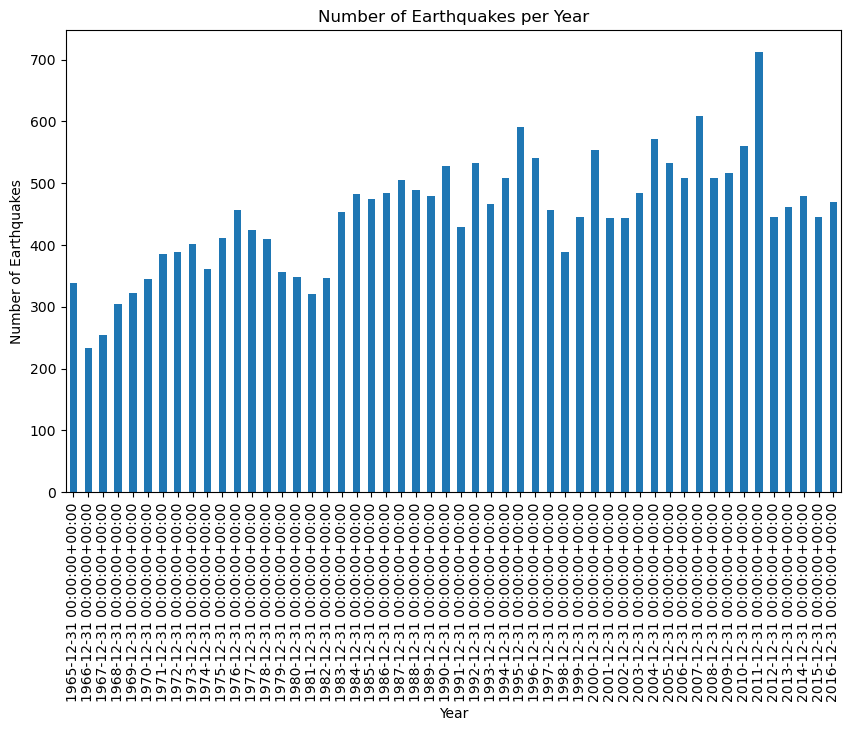

In [20]:

earthquakes_df_cleaned['Datetime'] = pd.to_datetime(earthquakes_df_cleaned['Date'].astype(str) + ' ' + earthquakes_df_cleaned['Time'], errors='coerce')


earthquakes_per_year = earthquakes_df_cleaned.resample('Y', on='Datetime').size()
earthquakes_per_year.plot(kind='bar', figsize=(10,6))
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()